___
# Logistic Regression with Python

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# import the data set for training
train = pd.read_csv('titanic_train.csv')

## Attribute Info

- Pclass: Passenger Class.
- SibSp: Indicates number of siblings or spouses aboard.
- Parch: Indicates number of parents aboard.
- Cabin: Cabin (if known).
- Embarked:Port where customer embarked.

In [4]:
# visualize first 5 rows
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Exploratory Anlaysis
- Search for missing data.
- Take a look at the set to see where we are missing any data and how we can clean as needed.
- We'll use a heatmap to view this.

<AxesSubplot:>

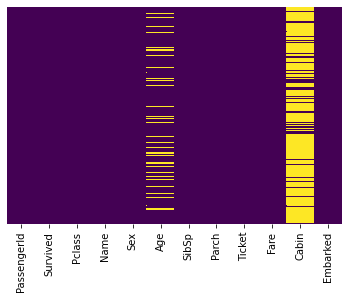

In [6]:
# creates a heatmap of True or False (null or not null), every yellow dash represents a True/Null value.
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Replacing some missing data
- Age is missing around 20% whereas Cabin is missing a lot.
- We will handle this later after fisrt exploring more of the data.

In [7]:
# set style
sns.set_style('whitegrid')

## Get a count of survived vs. not survived.

<AxesSubplot:xlabel='Survived', ylabel='count'>

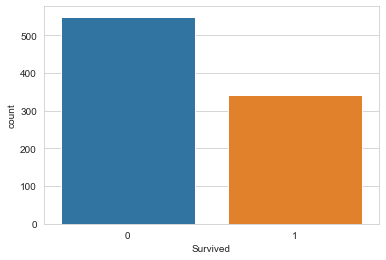

In [8]:
sns.countplot(x='Survived', data=train)

## Visulaize Survival with a hue of gender.

<AxesSubplot:xlabel='Survived', ylabel='count'>

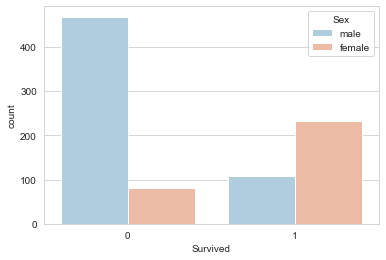

In [10]:
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')

**It appears that females were more likley to survive, over twice as likley than males.**

## Explore survival by passenger class

<AxesSubplot:xlabel='Survived', ylabel='count'>

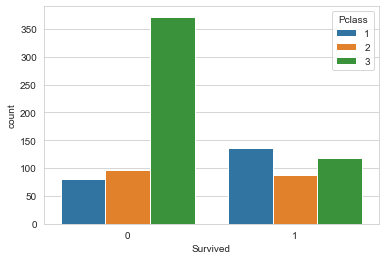

In [11]:
sns.countplot(x='Survived', hue='Pclass', data=train)

**The chart shows us that the overwhelming amount of non-survivors were part of the 3rd class. The majority of survivors lean towards the higher classes of 1 and 2.**

## Visualize age
- we know some are missing so for now, we will use dropna() to remove them so we can view an overall general histogram.

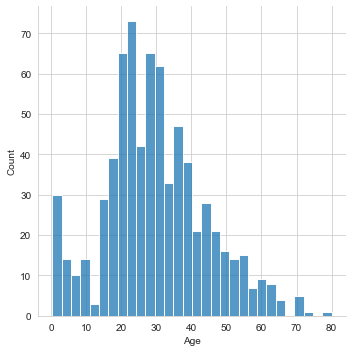

In [12]:
sns.displot(train['Age'].dropna(), kde=False, bins=30)

**The skew is towards younger passengers with the older having less representation.**

In [13]:
# look at the info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

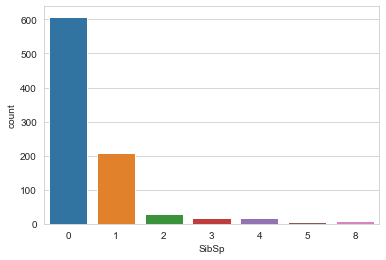

In [14]:
# explore the siblings counts
sns.countplot(x='SibSp', data=train)

**The plot shows us that most did not have a sibling or spouse onboard. The second option of 1 suggest there are spouses on onboard.**

## Explore the fares
- What does the distribution tell us?
- We can see that most fares are in the cheaper class.

<AxesSubplot:>

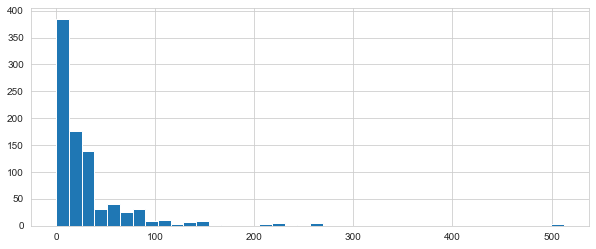

In [16]:
train['Fare'].hist(bins=40, figsize=(10,4))

## 2. Clean the data
- Handle missing data.
- Rather than drop them, we will use imputation and fill the missing values with the average age by passenger class.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

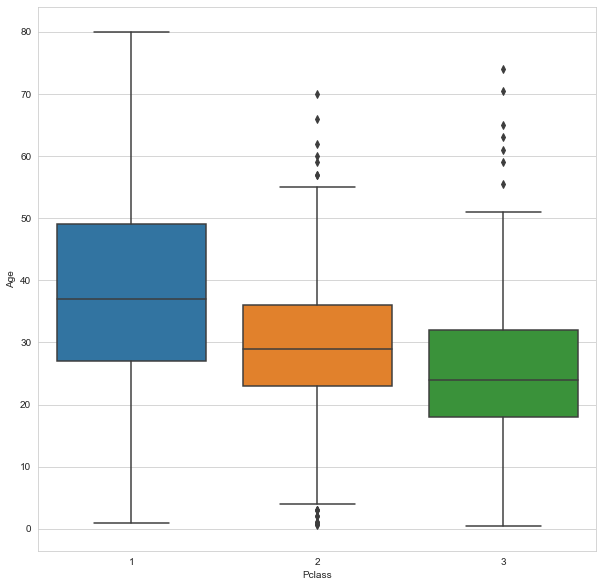

In [21]:
# make the figure a little larger
plt.figure(figsize=(10,10))

# create a box plot to see age by class
sns.boxplot(x='Pclass', y='Age', data=train)

### Breaking down the ages:
- We can see 1st class has an older median value and the median age decreases with class.
- This makes sense given the time period (1911 ish), wealth was generally attained after a period of working over the years and younger passengers may not have reached this status yet.

### Create a function and apply it to missing values

In [23]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    '''
    Use conditional logic to replcae the age using the median estimate from the chart.
    You can use the exact mean or median if you choose to do the calc in pandas but here its I am using
    an estimate from the above visual which is rather sufficient.
    '''
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else: #  Outer else: If age is not missing, return the existing passenger age.
        return Age
        

In [25]:
# apply the function to the age and passenger columns
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [26]:
# you can see now there are no missing values for age! Cabin will be dropped.
# you can use the heatmap but I dont find it neccesary.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
# drop the cabin column - too much msiing info
train.drop('Cabin', axis=1, inplace=True)

In [28]:
# visualize to see the dropped Cabin column.
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [29]:
# Embark has 2 missing values (889 rather than 891) so we will drop those rows because they are immaterial to the analysis. 
# Generally, we dont want to drop a row total that exceeds 5% of our total, since this is 2 rows, its fine.
train.dropna(inplace=True)

In [30]:
# now we have a complete data set with no missing values!
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


## 3. Convert catagorical features for modeling
- Convert into dummy variables with one hot encoding.
- Dummies use binary vvars 1 or 0.
- Multicolinearity must be dealt with because some cols will be perfrect predictors of other cols like Gender.

In [32]:
# to avoid multicolinearity use drop_first=True, this drops the first col (female) so the algo can predict using only the male.
gender = pd.get_dummies(train['Sex'], drop_first=True)

In [33]:
gender.head(3)

,male
0,1
1,0
2,0


In [34]:
# do the same for embark
embark = pd.get_dummies(train['Embarked'], drop_first=True)

embark.head(3)

,Q,S
0,0,1
1,0,0
2,0,1


#### Add these new dummy columns to our dataframe with concatenation

In [35]:
train = pd.concat([train, gender, embark], axis=1)

In [36]:
# view the results
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1


**We can drop some columns now that we have dummies to replace them. Drop Sex and Embarked. Also drop Ticket and Name becaseu they offer no value in this analysis.**

In [37]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [38]:
# the set is ready now with all cols, having data and being numerical.
train.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1


In [39]:
# drop passenger id because it is just an idex and we cant use it for any survival precition.
train.drop('PassengerId', axis=1, inplace=True)

In [40]:
train.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1


**Note: Pclass is a catagorical variable. Let's see how things turn out without using a dummy in place of it.**

## 4. Train and Build the model to predict survival of a passenger

**Create a train/test split.**
- The train data is being treated as all of the data.

In [41]:
# create our X and y varibales
# X - these are the predictors/features
X = train.drop('Survived', axis=1)

# y - we are trying to predict survival so this is our dependent variable
y = train['Survived']

In [42]:
# import sklearn
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Create the model.**

In [45]:
from sklearn.linear_model import LogisticRegression

**Create an instance of the LR model**

In [48]:
# you may have to increase the max iterations becasue the default is 100
logmodel = LogisticRegression(max_iter=1000)

**Train the model using the instance.**
- Use X_train, y_train

In [49]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

**Predict the values from X_test.**

In [50]:
predictions = logmodel.predict(X_test)

## 5. Evaluate the model
- Look at the various metrics: accuracy, F1, precision, etc.

In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



**Confusion Matrix**

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
print(confusion_matrix(y_test, predictions))

[[150  13]
 [ 32  72]]


## Conclusion
- Results are not that bad considering we use only the train data set rather than both train and test sets in the folder.
- The precision could be better but overall, its decent for a simple model.
- What does the model tell us? It tells us that we can predict the passengers survival using the features such as Pclass, age, gender etc. The confusion matric shows us that we did have type 1 and 2 errors or in other words, we predcited a survival when in fact the passenger did not survive and vice versa. Our accuracy was around 83% so it could use some improvement but the overall idea was to use a model and explore the foundational set up, steps involved and metrics used.